Protokoll zu Versuch 256 : Tobias Abele, Thimo Preis am 22.5.2017
==

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Teil 1: Auswertung der K$_\alpha $ Linien für die verschiedenen Proben
--

chi2= 0.227480145799
chi2_red= 0.0379133576331
sigma= 1.21130356302 ,Standardfehler= 0.0831448189476
Er= 14.012206151 ,Standardfehler= 0.0648073921052
 
Tabelle:
 
Elt.  |    Z   |     Ea    |     dEa   |     sqrt(Ea)   |  d sqrt(Ea)
---------------------------------------------------------------------
Fe    |    26  |     6410  |      180  |     80.062476  |    1.124122
Mo    |    42  |    17480  |      180  |    132.211951  |    0.680725
Ti    |    22  |     4520  |      170  |     67.230945  |    1.264299
Zr    |    40  |    15860  |      190  |    125.936492  |    0.754348
Zn    |    30  |     8740  |      180  |     93.487967  |    0.962691
Ag    |    47  |    21990  |      220  |    148.290256  |    0.741788
Cu    |    29  |     8130  |      180  |     90.166513  |    0.998153
Ni    |    28  |     7550  |      180  |     86.890736  |    1.035784


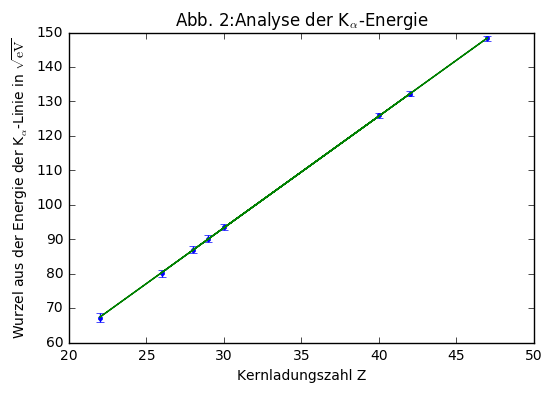

In [4]:
#dat                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  a
Z = np.array([26, 42, 22, 40, 30, 47, 29, 28]) #Die Kernladungszahlen der Elemente
Ea = np.array([6410, 17480, 4520, 15860, 8740, 21990, 8130, 7550]) #Das sind die Mu Werte in eV angegeben
error_Ea = np.array([180, 180, 170, 190, 180, 220, 180, 180]) #Das sind die sigma Werte in eV angegeben
sq_Ea = np.sqrt(Ea)
error_sq_Ea = sq_Ea/2*error_Ea/Ea
names = np.array(['Fe', 'Mo', 'Ti', 'Zr', 'Zn', 'Ag', 'Cu', 'Ni'])

#Fit
def fit_func(z, s, Er):
    return np.sqrt(Er)*(z-s)*np.sqrt(3/4) #Formel (4) im Skript: Energie der K alpha Strahlung
from scipy.optimize import curve_fit
popt, pcov=curve_fit(fit_func,Z,sq_Ea,p0=[1,13.6],sigma=error_sq_Ea)

#Plot von sqrt(E_a) über die Kernladungszahl
plt.title('Abb. 2:Analyse der K$_\\alpha$-Energie')
plt.xlabel('Kernladungszahl Z')
plt.ylabel('Wurzel aus der Energie der K$_\\alpha$-Linie in $\\sqrt{\mathrm{eV}}$')
#plt.ylim((0,430))
plt.errorbar(Z, sq_Ea, yerr=error_sq_Ea, linestyle='None', fmt='.')
plt.plot(Z,fit_func(Z,*popt))
plt.savefig('figures/Kerladungszahlabhängigkeit_alpha.pdf',format='pdf')

#Print
chi2_= np.sum((fit_func(Z,*popt)-sq_Ea)**2/error_sq_Ea**2)
dof = 6 #degrees of freedom
chi2_red=chi2_/dof
print("chi2=",chi2_)
print("chi2_red=",chi2_red)
print("sigma=",popt[0],",Standardfehler=",np.sqrt(pcov[0][0]))
print("Er=",popt[1],",Standardfehler=",np.sqrt(pcov[1][1]))

print(' ')
print('Tabelle:')
print(' ')
print('{0:4} {1:3} {2:4} {3:3} {4:7} {5:3} {6:7} {7:3} {8:12} {9:3} {10:10}'.format( \
      'Elt.', ' | ', '  Z', ' | ', '   Ea', ' | ', '   dEa', ' | ', '   sqrt(Ea)', ' | ', 'd sqrt(Ea)'))
print('---------------------------------------------------------------------')
for x in range(0, 8):
    print('{0:4} {1:3} {2:4d} {3:3} {4:7d} {5:3} {6:7d} {7:3} {8:12f} {9:3} {10:10f}'.format( \
          names[x], ' | ', Z[x], ' | ', Ea[x], ' | ', error_Ea[x], ' | ', sq_Ea[x], ' | ', error_sq_Ea[x]))

Teil 2: Auswertung der K$_\beta $ Linien für die verschiedenen Proben
--

chi2= 0.413908643859
chi2_red= 0.0689847739765
sigma= 1.49044697068 ,Standardfehler= 0.088575002521
Er= 13.4115405606 ,Standardfehler= 0.0691187662082
 
Tabelle:
 
Elt.  |    Z   |     Eb    |     dEb   |     sqrt(Eb)   |  d sqrt(Eb)
---------------------------------------------------------------------
Fe    |    26  |     7070  |      190  |     84.083292  |    1.129832
Mo    |    42  |    19570  |      190  |    139.892816  |    0.679091
Ti    |    22  |     5040  |      100  |     70.992957  |    0.704295
Zr    |    40  |    17730  |      190  |    133.154046  |    0.713459
Zn    |    30  |     9690  |      210  |     98.437798  |    1.066663
Ag    |    47  |    24650  |      250  |    157.003185  |    0.796162
Cu    |    29  |     9010  |      220  |     94.921020  |    1.158858
Ni    |    28  |     8350  |      210  |     91.378334  |    1.149069


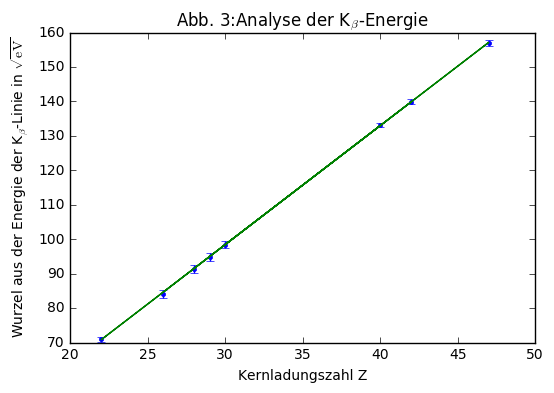

In [5]:
#data
Z = np.array([26, 42, 22, 40, 30, 47, 29, 28])
Eb = np.array([7070, 19570, 5040, 17730, 9690, 24650, 9010, 8350])#die Mu Werte der K beta Linie in eV
error_Eb = np.array([190, 190, 100, 190, 210, 250, 220, 210]) # die sigma Werte der K alpha Linie in eV
sq_Eb = np.sqrt(Eb)
error_sq_Eb = sq_Eb/2*error_Eb/Eb

#Fit
def fit_func(z, s, Er):
    return np.sqrt(Er)*(z-s)*np.sqrt(8/9) #Energie der K beta Strahlung
from scipy.optimize import curve_fit
popt, pcov=curve_fit(fit_func,Z,sq_Eb,p0=[1,13.6],sigma=error_sq_Eb)

#Plot
plt.title('Abb. 3:Analyse der K$_\\beta$-Energie')
plt.xlabel('Kernladungszahl Z')
plt.ylabel('Wurzel aus der Energie der K$_\\beta$-Linie in $\\sqrt{\mathrm{eV}}$')
#plt.ylim((0,430))
plt.errorbar(Z, sq_Eb, yerr=error_sq_Eb, linestyle='None', fmt='.')
plt.plot(Z,fit_func(Z,*popt))
plt.savefig('figures/Kerladungszahlabhängigkeit_beta.pdf',format='pdf')

#Print
chi2_= np.sum((fit_func(Z,*popt)-sq_Eb)**2/error_sq_Eb**2)
dof = 6 #degrees of freedom
chi2_red=chi2_/dof
print("chi2=",chi2_)
print("chi2_red=",chi2_red)
print("sigma=",popt[0],",Standardfehler=",np.sqrt(pcov[0][0]))
print("Er=",popt[1],",Standardfehler=",np.sqrt(pcov[1][1]))

print(' ')
print('Tabelle:')
print(' ')
print('{0:4} {1:3} {2:4} {3:3} {4:7} {5:3} {6:7} {7:3} {8:12} {9:3} {10:10}'.format( \
      'Elt.', ' | ', '  Z', ' | ', '   Eb', ' | ', '   dEb', ' | ', '   sqrt(Eb)', ' | ', 'd sqrt(Eb)'))
print('---------------------------------------------------------------------')
for x in range(0, 8):
    print('{0:4} {1:3} {2:4d} {3:3} {4:7d} {5:3} {6:7d} {7:3} {8:12f} {9:3} {10:10f}'.format( \
          names[x], ' | ', Z[x], ' | ', Eb[x], ' | ', error_Eb[x], ' | ', sq_Eb[x], ' | ', error_sq_Eb[x]))